# Regularization in Linear Regression

## Introduction 
Linear regression is very popular statistical model that is used to represent the relationship between some outcome variable $y_i$ and covariates (also known as features, explanatory variables, and independent variables) $x = (x_{1i}, x_{2i}, \ldots, x_{ki})$ using linear weights $\hat{\beta} = (\hat{\beta_{0}}, \hat{\beta_{1}}, \ldots, \hat{\beta_{k}}).$ The weights are choosen in a way such that the function $$f(x_{i};\hat{\beta}) = \hat{\beta_{0}} + \hat{\beta_{1}}x_{1i} + \ldots + \hat{\beta_{k}}x_{ki},$$ for $i = 1, \ldots, n$ best fits the data. Note that $\beta$ is a unknown regression parameter, and $\hat{\beta}$ is its estimate from a learning algorithm. That is the model $f(x_{i};\hat{\beta})$ is estimating the following assumed true linear relationsthip between $y_{i}$ and $x_{i},$
$$y_{i} = \beta_{0} + \beta_{1}x_{1i} + \ldots + \beta_{k}x_{ki} + \epsilon_{i},$$ where $\epsilon_{i}$ is a mean zero stochastic error term. The "linear" in linear regression means that the model is linear in the parameters, so $y_{i} = \beta_{0} + \beta_{1}x_{i}^2$ is a linear model, but $y_{i} = \beta_{0}x_{i}^{\beta_{1}}$ is nonlinear in parameters. 


This function can be used to predict outcome $y_{i}$ given any covariates $x_{1i}, \ldots, x_{ki}.$ However a caveat for using linear regression with many covariates for prediction is that the model may "overfit" the data and may not be generalizable. Overfitting occurs when the model captures too much of the noise in the data which cannot generalize outside of sample. We will discuss a popular remedy to the overfitting problem, regularization. Intuitively speaking, regularlization is a method of changing the standard definition of a model "best fitting" the data in a way that its predictions are more generalizable to new data sets. 

## Overfitting in linear regression

Overfitting is often a result of the model having too many parameters relative to the training data. Suppose we want to model the relationship between a outcome $y$ and covariate $x$ using $n$ data points. In this case, a $n-1$ degree polynomial in $x$ will perfectly fit the relationship between $y$ and $x$.

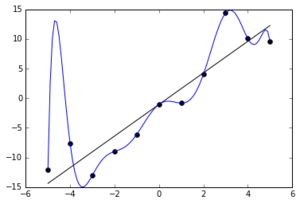

In [146]:
from IPython.display import Image, display
display(Image(filename='OverfittedData.png', embed=True))

In the figure above, from the black line we see a linear relationship between $y_{i}$ and $x_{i}$ for $i = 1, \ldots,11.$ Although the black line is a decent fit to the data, notice that the $10$ degree polynomial perfectly fits the data. Notice that the black line consists of two parameters $\alpha = (\alpha_{0},\alpha_{1})$ with a estimated function $g(x_{i};\hat{\alpha}) = \hat{\alpha_{0}} + \hat{\alpha_{1}}x_{i},$ whereas the blue polynomial consists of ten parameters, $\beta = (\beta_{0}, \beta_{1}, \ldots, \beta_{10})$ with a estimated function $f(x_{i}; \hat{\beta}) = \hat{\beta_{0}} + \hat{\beta_{1}}x_{i} + \ldots + \hat{\beta_{10}}x_{i}^{10}.$ Looking at the above plot, if we wanted to make a prediction for $y_{i}$ given $x_{i} = 10$, then $g(10;\hat{\alpha})$ will likely be more accurate then $f(10;\hat{\beta}).$ This is because $f(x_{i};\hat{\beta})$ is going to be decreasing function for large $x_{i}$ even though there is a positive relationship between $y_{i}$ and $x_{i}$. To summarize, if we were given more data to further examine the relationship between $y_{i}$ and $x_{i}$ above, it wouldn't be suprising if the simple black line above fit the data set better than the same $10$ degree blue polynomial. 

## Measuring fitness of a linear model

In this section we will discuss formally how a models fitness to the data is measured. Given our linear regression model $f(x_{i};\beta)$ and the outcome data $y_{i}$ we need to define a error function $Error(\beta).$ The most commonly used error function for the linear regression model is the square loss function, $$Error(\beta) = \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\beta)-y_{i})^2,$$ where $f(x_{i};\beta) = \beta_{0} + \beta_{1}x_{1i} + \ldots + \beta_{k}x_{ki}$ is a linear regression model. The smaller $Error(\beta)$ is, the better $f(x_{i};\beta)$ fits the data. Therefore $\beta$ is estimated for a linear regression model such that it minimizes $Error(\beta),$ that is $$\hat{\beta} = \text{argmin}_{\beta} \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\beta)-y_{i})^2.$$
Therefore our learning algorithm for estimating $\beta$ is to minimize some known loss function, this will give us our estimated linear regression model $f(x_{i}, \hat{\beta}).$

## L1 and L2 Regularization methods

Suppose we are trying to model the relationship between $y_{i}$ and $x_{i}$ using a high degree polynomial (10 degrees for example). If we minimize $Error(\beta)$ above (square loss) to estimate our model, then this model is prone to overfitting if the higher order terms are assigned large weights to caputure noise in the data. The simple idea behind regularization is that we add a penalty function to the standard square loss function so that learning algorithm doesn't easily assign large weights to the higher order covariates. The $L1$ regularized error function is $$Error_{L1}(\beta) = \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\beta)-y_{i})^2 + \frac{\lambda}{2} \sum_{i=1}^{k}|\beta_{i}|,$$ and the $L2$ regualirized error function is $$Error_{L2}(\beta) = \frac{1}{2}\sum_{i=1}^{n}(f(x_{i};\beta)-y_{i})^2 + \frac{\lambda}{2} \sum_{i=1}^{k}\beta_{i}^{2},$$ where $\lambda$ is the regularization parameter. Note that using the $L1$ loss function is known as lasso regression, and using the $L2$ loss function is known as ridge regression. The regularized terms $\frac{\lambda}{2} \sum_{i=1}^{k}|\beta_{i}|,\frac{\lambda}{2} \sum_{i=1}^{k}\beta_{i}^{2}$ in the $L1$ and $L2$ loss functions respectively shrink the parameters $(\beta_{1}, \ldots, \beta_{k})$ towards 0 (notice the intercept $\beta_{0}$ is excluded from the regularized term). Suppose the true relationship between $y_{i}$ and $x_{i}$ is quadratic, then regularization should prevent our 10 degree polynomial from overfitting as now the higher degree terms will likely be assigned lower weight than if we had used the standard sqaure loss $Error(\beta).$ The tuning parameter $\lambda$ is usually determined by using a methadology known as cross validation. We will leave cross validation for a future notebook, for now we will just set $\lambda = 5.$

## Applying regularization methods to IMDB movie data

Now that we have a basic sense of the regularization, we will use it estimate the parameters in a multiple linear regression framework to flexibly model the relationship between IMDB's movies score (rating out of 10) and the movies gross sales (in dollars). We will use a data set from https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset. The data contains various statistics from IMDB for over 5000 movies. For our purposes we will only be interested in the IMDB rating and gross sales revenue.

In [148]:
# Import dependencies
# numpy for matrix algbera
import numpy as np
# Pandas for data manipulation
import pandas as pd
# matplotlib for data visualization
import matplotlib.pyplot as plt

In [149]:
# Load the IMDB data
movie_data = pd.read_csv("movie_metadata.csv")

# Show structure of data set
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Data Cleaning and Summary statistics

Let's clean the data set a little bit. We will only keep the US movies since some of the gross revenues for movies from other countries are not reported in dollars. We will also only keep the imdb score and gross revenue variables for our analysis and drop the rest. I also informally convert the movie gross sales revenue in terms of 2017 dollar by assuming a $2.5\%$ yearly inflation rate. (To formally convert to 2017 dollars we would need to use consumer price index data from the US bureau of labour statistics) Also since we are dealing with real data, we need to take missing values into consideration. Finally, for the purposes of illustrating overfitting on a scatter plot, we will be randomly dropping $90\%$ of the data (this is ofcourse not recommended in practice). 

In [150]:
# Drop rows with missing gross revenue data (standard practice in regression analysis)
movie_data = movie_data.dropna(subset = ['gross'])

# Only keep data on movies from the US
movie_data = movie_data[movie_data['country'] == "USA"]

# Assuming a average US inflation rate of 2.5%, we convert gross revenue in terms of 2017 dollars
movie_data[['gross']] = (1.025**(2017-movie_data['title_year']))*movie_data['gross']

# Only keep the variables of interest, 'imdb_score' and 'gross'
movie_data = movie_data[['gross','imdb_score']]

# Let's scale the gross revenue to be in millions of dollars so its easier to read
movie_data[['gross']] = movie_data[['gross']]/1000000

# Randomly drop 90% of the data so overfitting from high degree polynomial can be seen on scatter plot
# This is not done in practice, we are just doing it to better visualize regulization methods

# Set seed so we get same random allocation on each run of code
np.random.seed(2017)

# Add column vector with observations generated randomly from U[0,1] distribution
movie_data["uniform"] = list(np.random.uniform(0,1, len(movie_data.index)))

# Only keep observations if uniform < 0.1 (this is randomly dropping 90% of data)
movie_data = movie_data[movie_data["uniform"] < 0.1]

# Drop uniform column, we just added it in to randomly drop 90% of observations
movie_data = movie_data[['gross','imdb_score']]
 
# Summary statistics (mean, stdev, min, max)
movie_data.describe()

,gross,imdb_score
count,303.000000,303.000000
mean,73.772574,6.371947
std,122.921231,1.050058
min,0.014931,2.100000
25%,9.921675,5.800000
50%,35.337785,6.500000
75%,82.631405,7.100000
max,1079.311263,9.300000


From the above summary statistics, we have gross sales revenue and imdb rating data for 303 US movies. The average gross sales revenue is 74 million dollars, and average imdb movie rating is 6.3 out of 10. 

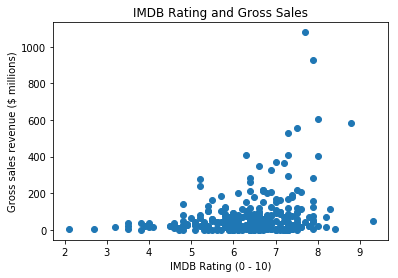

In [79]:
# Visualize data
plt.scatter(movie_data['imdb_score'], movie_data['gross'])

# Chart title
plt.title('IMDB Rating and Gross Sales')

# y-label
plt.ylabel('Gross sales revenue ($ millions)')

# x-label
plt.xlabel('IMDB Rating (0 - 10)')

# Show scatter plot
plt.show()

## Estimating linear model parameters

Optimization algorithms such as gradient descent or newton's method can be used to minimize a given loss function and estimate the parameters in our linear model. However since the main purpose of this notebook is to illustrate regularization methods, for code simplicity we will use well known closed form solutions to implement standard linear regression and $L2$ regularization. Using matrices, we can re-write the assumed true linear relationship between $y_{i}$ and $x_{i}$ as

$$\begin{bmatrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{n}
\end{bmatrix} 
=
\begin{bmatrix}
    1 & x_{11} & \ldots & x_{k1}\\
    \vdots & \vdots & \ldots & \vdots \\
    1 & x_{12} & \ldots & x_{k2}\\
    1 & x_{1n} & \ldots & x_{kn}
\end{bmatrix} 
\begin{bmatrix}
    \beta_{0} \\
    \beta_{1} \\
    \vdots \\
    \beta_{k}
\end{bmatrix} 
+
\begin{bmatrix}
    \epsilon_{1} \\
    \epsilon_{2} \\
    \vdots \\
    \epsilon_{n}
\end{bmatrix}.
$$
Using outcome vector $y$, coeffecient vector $\beta$, error vector $\epsilon$, and covariate matrix $X$ (also known as design matrix), we can re-write the above equation as $y = X\beta + \epsilon.$ For the standard square loss function, the closed form solution for the parameters is $\hat{\beta} = (X'X)^{-1}X'y,$ and for the $L2$ regularized loss function the closed form solution is $\hat{\beta} = (X'X + \lambda I)^{-1}X'y,$ where I = 
$
\begin{bmatrix}
    0 & 0 & \ldots & 0\\
    0 & 1 & \ldots & 0\\
    0 & 0 & 1 & 0 \\
    \vdots & \vdots & \ldots & \vdots \\
    0 & 0 & \ldots & 1
\end{bmatrix}. 
$
Note that the $L1$ regularized loss function doesn't have a closed form solution for the parameters so we have to use numerical methods to implement it. We will not be implementing the $L1$ regularized method here since the result will likely be similar to $L2$ for our small data set. As mentioned above, we will pick $\lambda = 5,$ and discuss a more formal method of choosing this tuning parameter in a future notebook.


## Deriving the closed form solutions
It's actually intuitive to formulate the closed form solutions showed for the standard linear and ridge regression. For ridge regression, the matrix representation of the $L2$ loss function is $$Error_{L2}(\beta) = \frac{1}{2}(f(x;\beta) - y)'(f(x;\beta) - y)+\frac{\lambda}{2}\beta'\beta,$$ where $y$ is outcome vector, $f(x,\beta) = X\beta$ is vector of linear model predictions, and $\beta$ is parameter vector. To estimate $\beta$, we minimize $Error_{L2}(\beta)$ and hence compute $\frac{d Error_{L2}(\beta)}{d\beta} = 0.$ After differentiation $Error_{L2}(\beta)$ with respect to $\beta$ we can obtain $$X'X\beta-X'y+\lambda I\beta = 0,$$ and rearranging the above equation results in $\hat{\beta} = (X'X + \lambda I)^{-1}X'y$, the closed form solution for ridge regression. The closed form solution for the standard linear regression with square loss can be derived in a similar manner. 

In [125]:
# Implement closed form solutions for linear and L2 norm regression
def estimate_model(y,X,Lambda):
    
    # X transpose
    Xtranspose = np.matrix.transpose(X)
    
    # Identity matrix (number of parameters is the dimension)
    Identity = np.identity(len(X[1,:]))
    
    # We don't add penalty to intercept
    Identity[0,0] = 0
    
    # Closed form solution is BetaHat = inv(X'X + Lambda*I)*X'y
    # Estimate model parameters (if Lambda = 0, we get standard square loss function result)
    BetaHat = np.dot(np.linalg.inv(np.add(np.dot(Xtranspose,X),Lambda*Identity)),np.dot(Xtranspose,y))
    
    return BetaHat

In [126]:
# Estimate a one degree linear regression model (using standard square loss function)
# Simple linear regression is y = B0 + B1*x

# Define outcome vector (gross movie sales revenue)
outcome = np.array(movie_data['gross'])

# Define covariate (IMDB movie rating)
imdb_score = np.array(movie_data['imdb_score'])

# Vector of ones (for B0)
ones = np.ones(len(y))

# Define design matrix
design_simple = np.column_stack((ones,imdb_score))

# Estimate (Beta0, Beta1) for simple linear regression model
betahat_simple = estimate_model(outcome,design_simple,0)
print betahat_simple


[-121.62584521   30.66541721]


In [127]:
# Estimate a five degree linear regression model (using standard square loss function)
# Mutiple linear regression is y = B0 + B1*x + B2*x^2 + ... + B5*x^5

# Define higher order covariates 
imdb_score2 = np.power(imdb_score,2)
imdb_score3 = np.power(imdb_score,3)
imdb_score4 = np.power(imdb_score,4)
imdb_score5 = np.power(imdb_score,5)

# Define design matrix
design_multiple = np.column_stack((ones,imdb_score, imdb_score2, imdb_score3, imdb_score4, imdb_score5))

# Estimate (Beta0, Beta1, Beta2, Beta3, Beta4, and Beta5) for multiple linear regression model
betahat_multiple = estimate_model(outcome,design_multiple,0)
print betahat_multiple

[  3.04527270e+03  -3.43064835e+03   1.43909990e+03  -2.83201925e+02
   2.64343143e+01  -9.39844521e-01]


In [138]:
# Estimate a L2 regularized loss function regression (also known as ridge regression)
# Multiple linear regression is y = B0 + B1*x + B2*x^2 + ... + B5*x^5

# Estimate (Beta0, Beta1, Beta2, Beta3, Beta4, and Beta5) for ridge regression
# We set Lambda = 5 as the tuning parameters for L2 regularization
betahat_multiple_L2 = estimate_model(outcome,design_multiple,5)
print betahat_multiple_L2

[-66.93302344  11.06526201  31.65362852 -12.57289485   1.68560811
  -0.07189237]


Notice how the estimated parameters for the ridge regression ($L2$ loss) are closer to $0$ than the estimated parameters from the multiple linear regression (standard square loss) as expected. 

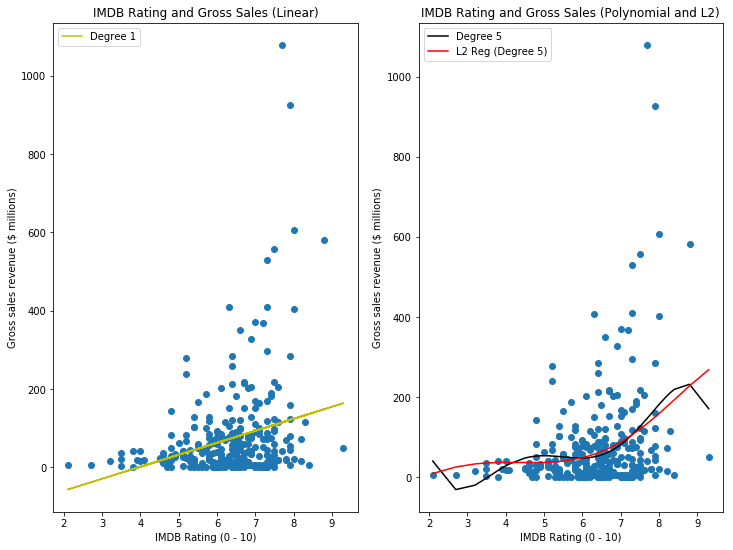

In [139]:
# Visualize simple linear regression (degree 1), figure on the left
plt.subplot(1, 2, 1)
plt.scatter(movie_data['imdb_score'], movie_data['gross'])

# Chart title
plt.title('IMDB Rating and Gross Sales (Linear)')

# y-label
plt.ylabel('Gross sales revenue ($ millions)')

# x-label
plt.xlabel('IMDB Rating (0 - 10)')

# Plot simple linear regression (degree 1)
simple, = plt.plot(imdb_score, betahat_simple[0] + imdb_score*betahat_simple[1], 'y')

# Legend for simple linear regression scatter plot, plot on left
plt.legend([simple], ['Degree 1'])

# Visualize multiple linear regression (degree 5) and L2 loss function (degree 5), figure on the right
plt.subplot(1, 2, 2)
plt.scatter(movie_data['imdb_score'], movie_data['gross'])

# Chart title
plt.title('IMDB Rating and Gross Sales (Polynomial and L2)')

# y-label
plt.ylabel('Gross sales revenue ($ millions)')

# x-label
plt.xlabel('IMDB Rating (0 - 10)')

# Plot multiple linear regression (degree 5)
multiple, = plt.plot(np.sort(imdb_score), betahat_multiple[0] + np.sort(imdb_score)*betahat_multiple[1] 
         + np.sort(imdb_score2)*betahat_multiple[2] + np.sort(imdb_score3)*betahat_multiple[3] 
         + np.sort(imdb_score4)*betahat_multiple[4] + np.sort(imdb_score5)*betahat_multiple[5],'-k')

# Plot ridge regression (L2 loss function with degree 5)
ridge, = plt.plot(np.sort(imdb_score), betahat_multiple_L2[0] + np.sort(imdb_score)*betahat_multiple_L2[1] 
        + np.sort(imdb_score2)*betahat_multiple_L2[2] + np.sort(imdb_score3)*betahat_multiple_L2[3] 
         + np.sort(imdb_score4)*betahat_multiple_L2[4] + np.sort(imdb_score5)*betahat_multiple_L2[5],'r')

# Set legend for plot on the right
plt.legend([multiple, ridge], ['Degree 5','L2 Reg (Degree 5)'])

# Show scatter plots
plt.show()

## Conclusion
The left plot shows a simple degree 1 linear regression model (square loss) fit to the data, and the right figure illustrates a degree 5 linear regression polynomial (square loss) as well as degee 5 ridge regression ($L2$ loss). From the figure on the left, the line (yellow) doesn't seem to fit the data well as it does not capture the non-linearities in gross revenues for higher rated movies, and predicts negative gross revenues for low rated movies. In contrast, although the degree 5 polynomial (black) shown to the right camptures nonlinear patterns in the data, it seems to overfit the data as it predicts decreasing gross sales revenue for the highly rated movies. Finally the ridge regression (degree 5 with $L2$ loss) shown to the right seems to be "just correct" as it captures the non-linear increase in gross sales revenue with increasing movie rating. 